In [1]:
# imports
import matplotlib.pyplot as plt
import matplotlib
# import joblib
import cv2
import os
import torch 
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import random
import math
import sys
sys.path.append('../../')

#import pretrainedmodels
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

from gated import *
# from resnet_gated_without_skip import *
# from resnet_gated import *
from resnet import *
from train import train, test
from dataset import *

In [2]:
# !pip install pretrainedmodels

In [3]:
#device = torch.device("cpu")
device = torch.device("cuda")
dtype = torch.float

BATCH_SIZE = 64

In [4]:
image_paths = list(paths.list_images('../../data/101_ObjectCategories'))
data = []
labels = []
for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]
    if label == 'BACKGROUND_Google':
        continue
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    data.append(image)
    labels.append(label)
data = np.array(data)
labels = np.array(labels)

/home/beomgon/anaconda3/envs/pytorch_retina/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


In [5]:
len(set(labels))

101

In [6]:
# one hot encode
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(f"Total number of classes: {len(lb.classes_)}")


Total number of classes: 101


In [7]:
# divide the data into train, validation, and test set
(x_train, x_val , y_train, y_val) = train_test_split(data, labels, 
                                                    test_size=0.3,  
                                                    stratify=labels,
                                                    random_state=42)

(x_val, x_test, y_val, y_test) = train_test_split(x_val, y_val, 
                                                    test_size=0.65, 
                                                    random_state=42)
print(f"x_train examples: {x_train.shape}\nx_test examples: {x_test.shape}\nx_val examples: {x_val.shape}")

x_train examples: (6073,)
x_test examples: (1693,)
x_val examples: (911,)


In [8]:
np.argmax(y_val[:20], axis=-1)

array([98,  3, 65, 52,  0,  1, 71, 72,  3,  3, 23,  3,  1, 55,  1, 11, 17,
       40, 90, 53])

In [9]:
train_data = ImageDataset(x_train, y_train, train_transform)
val_data = ImageDataset(x_val, y_val, val_transform)
test_data = ImageDataset(x_test, y_test, val_transform)

# dataloaders
trainloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
valloader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)
testloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [10]:
# model.eval()

Training on 6073 examples, validating on 911 examples...
dilation [False, False, False]
stride 1
LeakyReLU(negative_slope=0.01)
LeakyReLU(negative_slope=0.01)
downsample
stride 2
LeakyReLU(negative_slope=0.01)
LeakyReLU(negative_slope=0.01)
downsample
stride 2
LeakyReLU(negative_slope=0.01)
LeakyReLU(negative_slope=0.01)
downsample
stride 2
LeakyReLU(negative_slope=0.01)
LeakyReLU(negative_slope=0.01)
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0005
    weight_decay: 0
)
Epoch 1 of 25
Train Loss: 0.0513, Train Acc: 30.02
Val Loss: 0.0519, Val Acc: 32.49
Epoch 2 of 25
Train Loss: 0.0401, Train Acc: 42.01
Val Loss: 0.0413, Val Acc: 41.05
Epoch 3 of 25
Train Loss: 0.0331, Train Acc: 50.06
Val Loss: 0.0338, Val Acc: 51.70
Epoch 4 of 25
Train Loss: 0.0276, Train Acc: 57.22
Val Loss: 0.0346, Val Acc: 52.69
Epoch 5 of 25
Train Loss: 0.0227, Train Acc: 63.31
Val Loss: 0.0286, Val Acc: 56.97
Epoch 6 of 25
Train Loss: 0.0180, Train Acc: 71.13
Val 

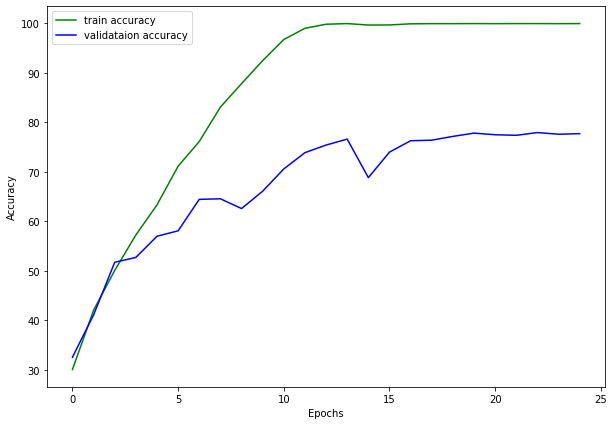

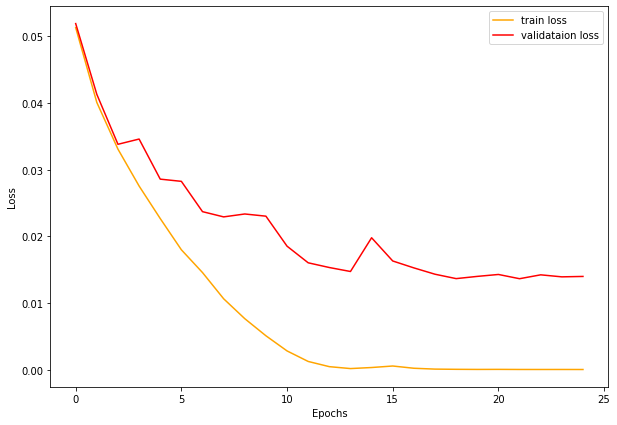

In [11]:
print(f"Training on {len(train_data)} examples, validating on {len(val_data)} examples...")
model = resnet18(pretrained=False, activation='leakyrelu').to(device)
train(model, trainloader, valloader)
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

dilation [False, False, False]
stride 1
ReLU()
ReLU()
downsample
stride 2
ReLU()
ReLU()
downsample
stride 2
ReLU()
ReLU()
downsample
stride 2
ReLU()
ReLU()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0005
    weight_decay: 0
)
Epoch 1 of 25
Train Loss: 0.0516, Train Acc: 30.05
Val Loss: 0.0516, Val Acc: 36.00
Epoch 2 of 25
Train Loss: 0.0394, Train Acc: 42.66
Val Loss: 0.0379, Val Acc: 45.77
Epoch 3 of 25
Train Loss: 0.0323, Train Acc: 50.96
Val Loss: 0.0381, Val Acc: 47.97
Epoch 4 of 25
Train Loss: 0.0265, Train Acc: 58.54
Val Loss: 0.0328, Val Acc: 53.90
Epoch 5 of 25
Train Loss: 0.0217, Train Acc: 65.52
Val Loss: 0.0309, Val Acc: 54.45
Epoch 6 of 25
Train Loss: 0.0168, Train Acc: 72.80
Val Loss: 0.0229, Val Acc: 63.56
Epoch 7 of 25
Train Loss: 0.0128, Train Acc: 79.53
Val Loss: 0.0269, Val Acc: 60.15
Epoch 8 of 25
Train Loss: 0.0092, Train Acc: 85.20
Val Loss: 0.0252, Val Acc: 64.22
Epoch 9 of 25
Train Loss: 0.0060, Train Acc: 91.54
V

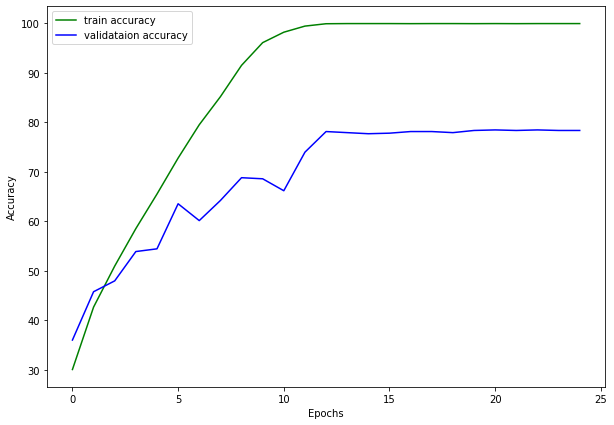

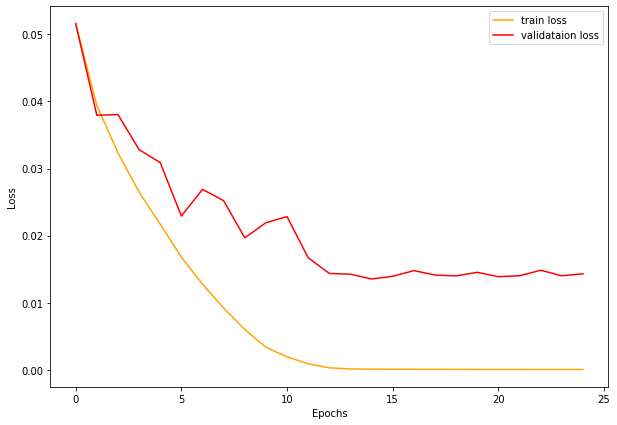

In [12]:
model = resnet18(pretrained=False, activation='relu').to(device)
train(model, trainloader, valloader)
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

dilation [False, False, False]
stride 1
ELU(alpha=1.0)
ELU(alpha=1.0)
downsample
stride 2
ELU(alpha=1.0)
ELU(alpha=1.0)
downsample
stride 2
ELU(alpha=1.0)
ELU(alpha=1.0)
downsample
stride 2
ELU(alpha=1.0)
ELU(alpha=1.0)
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0005
    weight_decay: 0
)
Epoch 1 of 25
Train Loss: 0.0513, Train Acc: 31.17
Val Loss: 0.0466, Val Acc: 37.21
Epoch 2 of 25
Train Loss: 0.0400, Train Acc: 41.45
Val Loss: 0.0459, Val Acc: 41.27
Epoch 3 of 25
Train Loss: 0.0340, Train Acc: 48.82
Val Loss: 0.0360, Val Acc: 48.30
Epoch 4 of 25
Train Loss: 0.0294, Train Acc: 54.36
Val Loss: 0.0340, Val Acc: 50.93
Epoch 5 of 25
Train Loss: 0.0256, Train Acc: 59.00
Val Loss: 0.0306, Val Acc: 54.45
Epoch 6 of 25
Train Loss: 0.0217, Train Acc: 64.99
Val Loss: 0.0333, Val Acc: 52.80
Epoch 7 of 25
Train Loss: 0.0186, Train Acc: 69.57
Val Loss: 0.0264, Val Acc: 60.37
Epoch 8 of 25
Train Loss: 0.0160, Train Acc: 73.79
Val Loss: 0.0243, Val

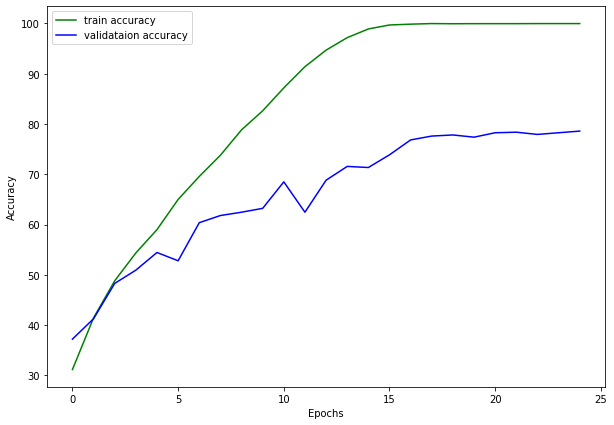

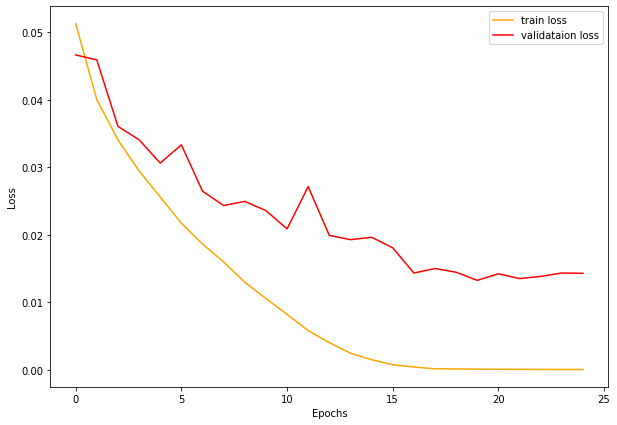

In [13]:
model = resnet18(pretrained=False, activation='elu').to(device)
train(model, trainloader, valloader)
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

dilation [False, False, False]
stride 1
GELU()
GELU()
downsample
stride 2
GELU()
GELU()
downsample
stride 2
GELU()
GELU()
downsample
stride 2
GELU()
GELU()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0005
    weight_decay: 0
)
Epoch 1 of 25
Train Loss: 0.0522, Train Acc: 29.54
Val Loss: 0.0515, Val Acc: 32.82
Epoch 2 of 25
Train Loss: 0.0396, Train Acc: 42.04
Val Loss: 0.0398, Val Acc: 46.32
Epoch 3 of 25
Train Loss: 0.0321, Train Acc: 51.34
Val Loss: 0.0341, Val Acc: 51.59
Epoch 4 of 25
Train Loss: 0.0262, Train Acc: 59.26
Val Loss: 0.0349, Val Acc: 52.36
Epoch 5 of 25
Train Loss: 0.0209, Train Acc: 67.43
Val Loss: 0.0270, Val Acc: 58.95
Epoch 6 of 25
Train Loss: 0.0163, Train Acc: 73.77
Val Loss: 0.0239, Val Acc: 62.79
Epoch 7 of 25
Train Loss: 0.0121, Train Acc: 80.65
Val Loss: 0.0247, Val Acc: 61.36
Epoch 8 of 25
Train Loss: 0.0085, Train Acc: 87.02
Val Loss: 0.0243, Val Acc: 63.56
Epoch 9 of 25
Train Loss: 0.0051, Train Acc: 92.66
V

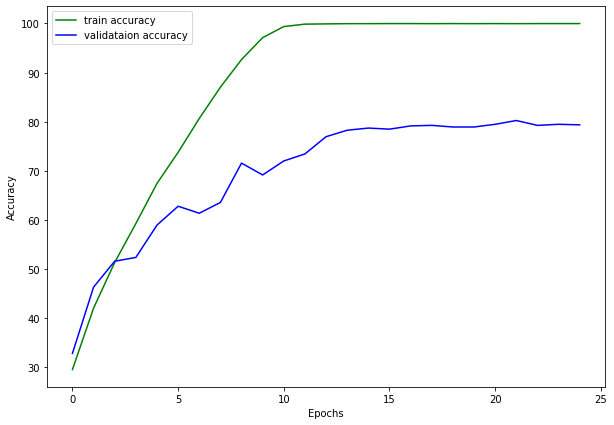

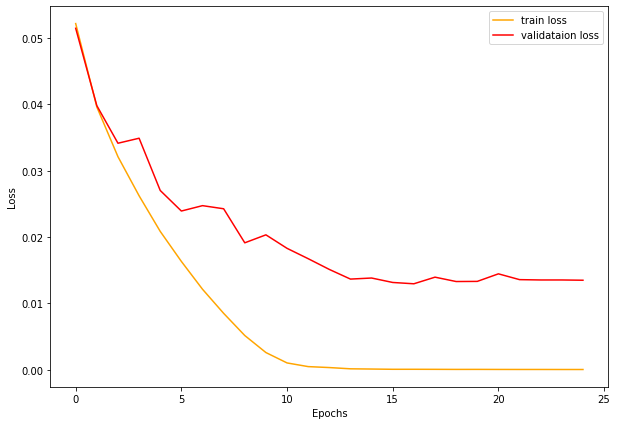

In [14]:
model = resnet18(pretrained=False, activation='gelu').to(device)
train(model, trainloader, valloader)
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

dilation [False, False, False]
stride 1
Sigmoid()
Sigmoid()
downsample
stride 2
Sigmoid()
Sigmoid()
downsample
stride 2
Sigmoid()
Sigmoid()
downsample
stride 2
Sigmoid()
Sigmoid()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0005
    weight_decay: 0
)
Epoch 1 of 25
Train Loss: 0.0527, Train Acc: 28.55
Val Loss: 0.0499, Val Acc: 37.21
Epoch 2 of 25
Train Loss: 0.0415, Train Acc: 40.26
Val Loss: 0.0428, Val Acc: 40.83
Epoch 3 of 25
Train Loss: 0.0353, Train Acc: 47.23
Val Loss: 0.0393, Val Acc: 45.99
Epoch 4 of 25
Train Loss: 0.0305, Train Acc: 52.99
Val Loss: 0.0370, Val Acc: 48.52
Epoch 5 of 25
Train Loss: 0.0267, Train Acc: 58.26
Val Loss: 0.0325, Val Acc: 52.36
Epoch 6 of 25
Train Loss: 0.0226, Train Acc: 63.53
Val Loss: 0.0358, Val Acc: 48.08
Epoch 7 of 25
Train Loss: 0.0198, Train Acc: 67.64
Val Loss: 0.0359, Val Acc: 48.85
Epoch 8 of 25
Train Loss: 0.0171, Train Acc: 71.53
Val Loss: 0.0320, Val Acc: 54.67
Epoch 9 of 25
Train Loss: 0.

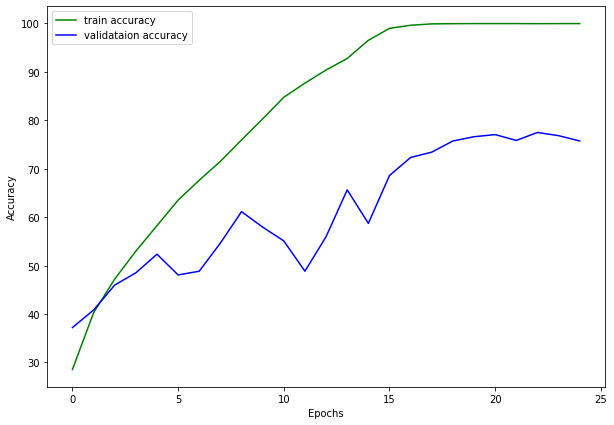

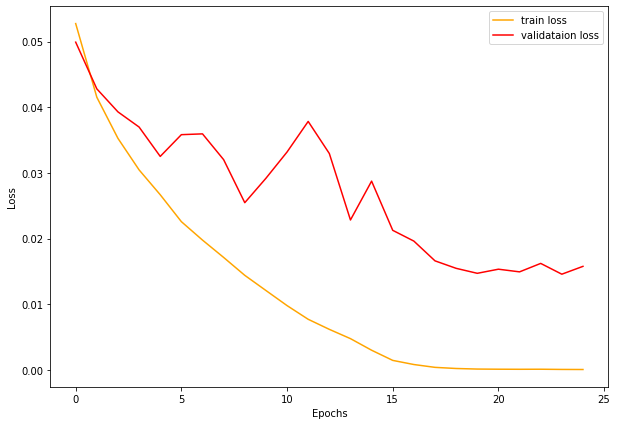

In [15]:
model = resnet18(pretrained=False, activation='sigmoid').to(device)
train(model, trainloader, valloader)
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

dilation [False, False, False]
stride 1
Tanh()
Tanh()
downsample
stride 2
Tanh()
Tanh()
downsample
stride 2
Tanh()
Tanh()
downsample
stride 2
Tanh()
Tanh()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0005
    weight_decay: 0
)
Epoch 1 of 25
Train Loss: 0.0519, Train Acc: 29.69
Val Loss: 0.0507, Val Acc: 32.38
Epoch 2 of 25
Train Loss: 0.0400, Train Acc: 41.91
Val Loss: 0.0398, Val Acc: 46.54
Epoch 3 of 25
Train Loss: 0.0341, Train Acc: 48.87
Val Loss: 0.0359, Val Acc: 49.18
Epoch 4 of 25
Train Loss: 0.0300, Train Acc: 53.93
Val Loss: 0.0336, Val Acc: 50.93
Epoch 5 of 25
Train Loss: 0.0257, Train Acc: 59.26
Val Loss: 0.0341, Val Acc: 50.93
Epoch 6 of 25
Train Loss: 0.0223, Train Acc: 64.76
Val Loss: 0.0271, Val Acc: 58.51
Epoch 7 of 25
Train Loss: 0.0191, Train Acc: 68.86
Val Loss: 0.0280, Val Acc: 58.07
Epoch 8 of 25
Train Loss: 0.0160, Train Acc: 73.44
Val Loss: 0.0224, Val Acc: 65.31
Epoch 9 of 25
Train Loss: 0.0133, Train Acc: 78.53
V

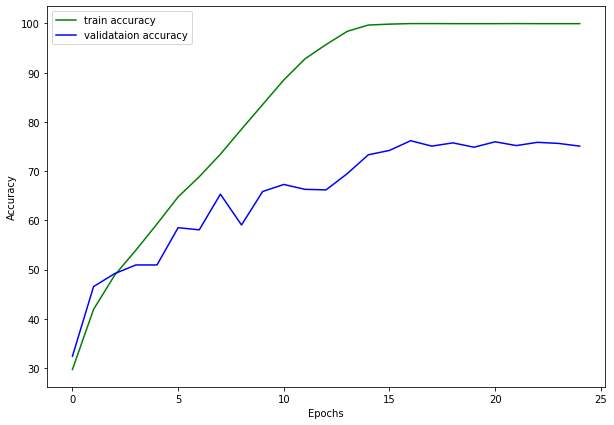

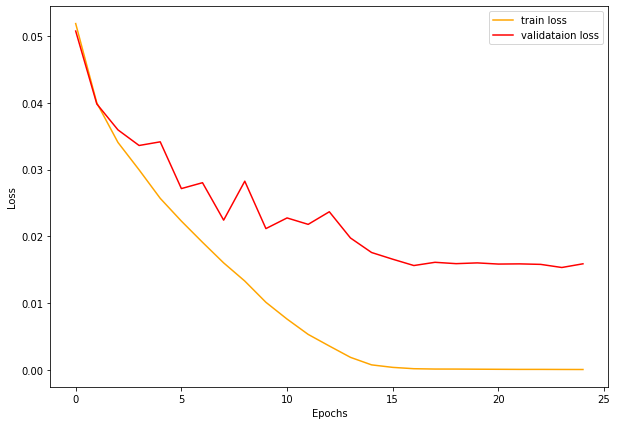

In [16]:
model = resnet18(pretrained=False, activation='tanh').to(device)
train(model, trainloader, valloader)
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

dilation [False, False, False]
stride 1
GELU()
GELU()
downsample
stride 2
GELU()
GELU()
downsample
stride 2
GELU()
GELU()
downsample
stride 2
GELU()
GELU()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0005
    weight_decay: 0
)
Epoch 1 of 25
Train Loss: 0.0519, Train Acc: 30.36
Val Loss: 0.0498, Val Acc: 33.26
Epoch 2 of 25
Train Loss: 0.0393, Train Acc: 43.34
Val Loss: 0.0410, Val Acc: 44.79
Epoch 3 of 25
Train Loss: 0.0327, Train Acc: 50.52
Val Loss: 0.0331, Val Acc: 52.14
Epoch 4 of 25
Train Loss: 0.0269, Train Acc: 57.43
Val Loss: 0.0302, Val Acc: 54.56
Epoch 5 of 25
Train Loss: 0.0225, Train Acc: 63.89
Val Loss: 0.0291, Val Acc: 55.43
Epoch 6 of 25
Train Loss: 0.0178, Train Acc: 71.00
Val Loss: 0.0244, Val Acc: 61.03
Epoch 7 of 25
Train Loss: 0.0136, Train Acc: 78.22
Val Loss: 0.0233, Val Acc: 63.89
Epoch 8 of 25
Train Loss: 0.0104, Train Acc: 83.55
Val Loss: 0.0231, Val Acc: 65.42
Epoch 9 of 25
Train Loss: 0.0069, Train Acc: 89.08
V

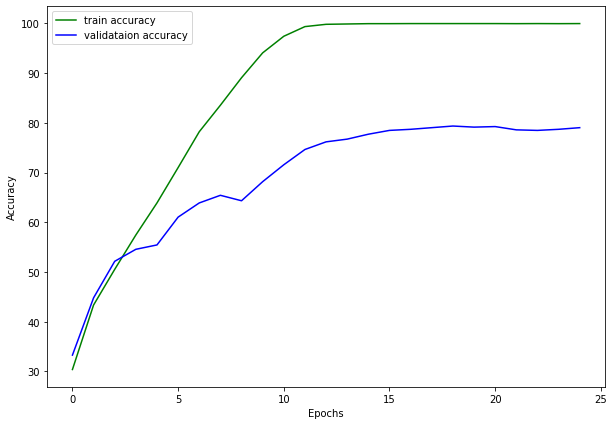

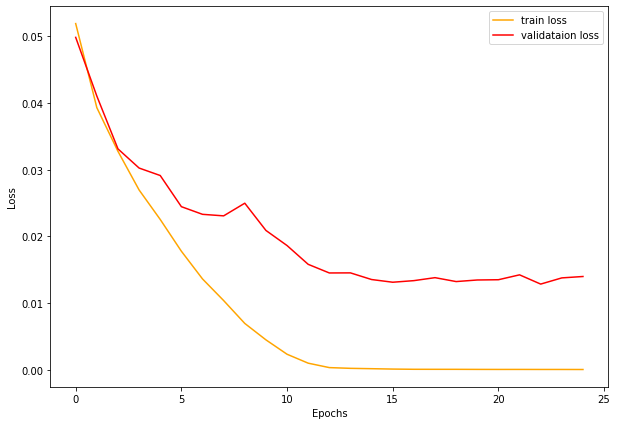

In [17]:
model = resnet18(pretrained=False, activation='gelu').to(device)
train(model, trainloader, valloader)
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))